In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import cv2

def display_npy_video(npy_path, fps=30, figsize=(10, 6), save_as_gif=None, show_inline=True):
    """
    Display a video stored as a numpy array (.npy file).
    
    Parameters:
    -----------
    npy_path : str
        Path to the .npy file containing video frames
    fps : int, default=30
        Frames per second for playback
    figsize : tuple, default=(10, 6)
        Figure size (width, height) in inches
    save_as_gif : str, optional
        Path to save the video as a GIF file
    show_inline : bool, default=True
        Whether to display the video inline (for Jupyter notebooks)
    
    Returns:
    --------
    matplotlib.animation.FuncAnimation
        Animation object that can be further customized
    """
    
    # Load the numpy video array
    try:
        video_array = np.load(npy_path)
        print(f"Loaded video with shape: {video_array.shape}")
    except Exception as e:
        print(f"Error loading {npy_path}: {e}")
        return None
    
    # Validate video array dimensions
    if len(video_array.shape) not in [3, 4]:
        print(f"Invalid video shape: {video_array.shape}")
        print("Expected shape: (frames, height, width) or (frames, height, width, channels)")
        return None
    
    # Handle different color formats
    if len(video_array.shape) == 4:
        # Color video (frames, height, width, channels)
        frames, height, width, channels = video_array.shape
        if channels == 3:
            # RGB or BGR - assume RGB for matplotlib
            cmap = None
        elif channels == 1:
            # Grayscale with channel dimension
            video_array = video_array.squeeze(axis=3)
            cmap = 'gray'
        else:
            print(f"Unsupported number of channels: {channels}")
            return None
    else:
        # Grayscale video (frames, height, width)
        frames, height, width = video_array.shape
        cmap = 'gray'
    
    print(f"Video info: {frames} frames, {height}x{width} resolution")
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f"Video: {npy_path}")
    ax.axis('off')
    
    # Initialize the plot with the first frame
    if cmap:
        im = ax.imshow(video_array[0], cmap=cmap, animated=True)
    else:
        im = ax.imshow(video_array[0], animated=True)
    
    # Animation function
    def animate(frame_idx):
        im.set_array(video_array[frame_idx])
        ax.set_title(f"Frame {frame_idx + 1}/{frames}")
        return [im]
    
    # Create animation
    interval = 1000 / fps  # Convert fps to milliseconds
    anim = animation.FuncAnimation(
        fig, animate, frames=frames, interval=interval, 
        blit=True, repeat=True
    )
    
    # Save as GIF if requested
    if save_as_gif:
        print(f"Saving as GIF: {save_as_gif}")
        anim.save(save_as_gif, writer='pillow', fps=fps)
        print("GIF saved successfully!")
    
    # Display inline for Jupyter notebooks
    if show_inline:
        try:
            return HTML(anim.to_jshtml())
        except:
            plt.show()
            return anim
    else:
        plt.show()
        return anim


def display_npy_video_opencv(npy_path, fps=30, window_name="NPY Video"):
    """
    Alternative function to display NPY video using OpenCV.
    Useful for desktop applications or when matplotlib is not suitable.
    
    Parameters:
    -----------
    npy_path : str
        Path to the .npy file containing video frames
    fps : int, default=30
        Frames per second for playback
    window_name : str
        Name of the display window
    """
    
    try:
        video_array = np.load(npy_path)
        print(f"Loaded video with shape: {video_array.shape}")
    except Exception as e:
        print(f"Error loading {npy_path}: {e}")
        return
    
    # Validate dimensions
    if len(video_array.shape) not in [3, 4]:
        print(f"Invalid video shape: {video_array.shape}")
        return
    
    # Calculate delay between frames
    delay = int(1000 / fps)  # milliseconds
    
    print(f"Playing video. Press 'q' to quit, 'p' to pause/resume, 'r' to restart")
    
    frame_idx = 0
    paused = False
    
    while True:
        if not paused:
            # Get current frame
            if len(video_array.shape) == 4:
                frame = video_array[frame_idx]
                # Convert RGB to BGR for OpenCV if needed
                if video_array.shape[3] == 3:
                    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            else:
                frame = video_array[frame_idx]
            
            # Ensure frame is in correct data type
            if frame.dtype != np.uint8:
                if frame.max() <= 1.0:
                    frame = (frame * 255).astype(np.uint8)
                else:
                    frame = frame.astype(np.uint8)
            
            cv2.imshow(window_name, frame)
            
            # Move to next frame
            frame_idx = (frame_idx + 1) % len(video_array)
        
        # Handle keyboard input
        key = cv2.waitKey(delay) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('p'):
            paused = not paused
        elif key == ord('r'):
            frame_idx = 0
    
    cv2.destroyAllWindows()

Loaded video with shape: (42, 422, 636, 3)
Video info: 42 frames, 422x636 resolution


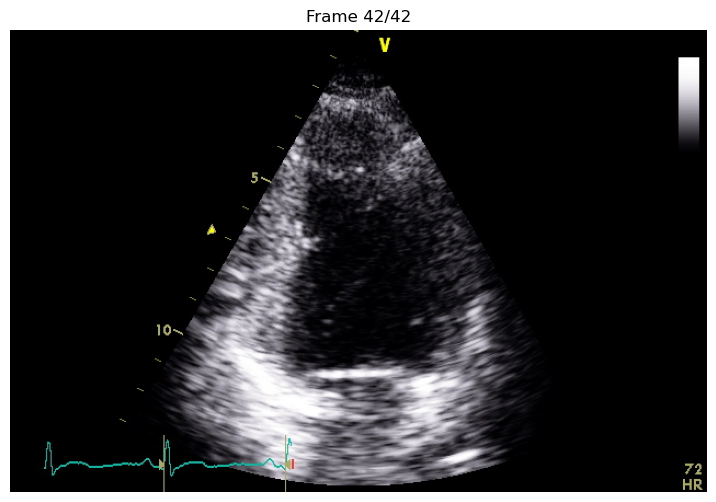

In [2]:
npy_video = './npy_videos/A2C/ES0001_CH2_1.npy'

# Basic display
anim = display_npy_video(npy_video, fps=30)

# Save as GIF while displaying
# anim = display_npy_video('my_video.npy', fps=30, save_as_gif='output.gif')

In [3]:
# Use OpenCV for desktop display with controls
display_npy_video_opencv(npy_video, fps=30)

Loaded video with shape: (42, 422, 636, 3)
Playing video. Press 'q' to quit, 'p' to pause/resume, 'r' to restart
